# Preprocessing and linguistic annotation (NLP)

Within a computer, text is encoded as a continuous string of characters. For a computer, there is no difference between a space, a punctuation mark, or an alpha-numeric character. This means that a computer does not know about word or sentence boundaries. 

In order to analyze textual data within natural language processing applications, we first need to properly preprocess it. A natural language preprocessing pipeline generally consists of the following steps:

- **Sentence segmentation:** divides an entire document string into invidivual sentences.
- **Tokenization:** process of dividing the sentence into meaningful units, called tokens (which will most often be words).
- **Lemmatization:** process that transforms each word form to its canonical base form, called lemma.
- **Part of speech tagging:** process of assigning to each word its word class (part of speech).
- **Syntactic parsing:** process of finding structural relationships between words and phrases, such that a grammatical structure is assigned.



**Spacy** is a python module that implements this natural language processing pipeline, in order to carry out tasks such as segmentation, tokenization, lemmatization and pos-tagging. We will use it in order to preprocess English texts. (It can be used in others languages as well)

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

In [5]:
#Text from: https://www.theguardian.com/world/live/2023/oct/10/israel-hamas-war-live-updates-palestine-gaza-supernova-white-house

text = "'The humanitarian situation in Gaza was extremely dire before these hostilities; now it will only deteriorate exponentially,' Guterres told reporters at the UN in New York yesterday. 'Medical equipment, food, fuel and other humanitarian supplies are desperately needed, along with access for humanitarian personnel.'"
doc = nlp(text)

In [6]:
for sentence in doc.sents:
  print(sentence)

'The humanitarian situation in Gaza was extremely dire before these hostilities; now it will only deteriorate exponentially,' Guterres told reporters at the UN in New York yesterday.
'Medical equipment, food, fuel and other humanitarian supplies are desperately needed, along with access for humanitarian personnel.'


In [7]:
for element in doc:
  print(element.text, element.lemma_, element.pos_)

' ' PUNCT
The the DET
humanitarian humanitarian ADJ
situation situation NOUN
in in ADP
Gaza Gaza PROPN
was be AUX
extremely extremely ADV
dire dire ADJ
before before ADP
these these DET
hostilities hostility NOUN
; ; PUNCT
now now ADV
it it PRON
will will AUX
only only ADV
deteriorate deteriorate VERB
exponentially exponentially ADV
, , PUNCT
' ' PUNCT
Guterres guterre NOUN
told tell VERB
reporters reporter NOUN
at at ADP
the the DET
UN UN PROPN
in in ADP
New New PROPN
York York PROPN
yesterday yesterday NOUN
. . PUNCT
' ' PUNCT
Medical medical ADJ
equipment equipment NOUN
, , PUNCT
food food NOUN
, , PUNCT
fuel fuel NOUN
and and CCONJ
other other ADJ
humanitarian humanitarian ADJ
supplies supply NOUN
are be AUX
desperately desperately ADV
needed need VERB
, , PUNCT
along along ADP
with with ADP
access access NOUN
for for ADP
humanitarian humanitarian ADJ
personnel personnel NOUN
. . PUNCT
' ' PUNCT


In [17]:
from spacy import displacy
displacy.render(doc, style = 'dep', jupyter = True, options = {'distance': 90})

In [ ]:
for ent in doc.ents:
    print(ent.text, ent.label_)

You can equally create a visual representation of the named entities within a text using the command below:

In [18]:
displacy.render(doc, style = 'ent', jupyter = True)

## What about word embeddings?

Word embedding is just a fancy way of saying numerical representation of words. 

The same way that RGB represent colors.

### **One-hot-encodding:**

**One-hot-encodding:**

For a simple example, if we have 4 words (peach, strawberry, city, Sint-Katelijne-Wavre) in our vocabulary then we can represent them as following:

Peach [1, 0, 0, 0] \
Strawberry [0, 1, 0, 0]\
City [0, 0, 1, 0]\
Sint-Katelijne-Wavre [0, 0, 0, 1]

**Problems of using One-hot-encodding:**
- Generated vectors will be dependent os the vocabulary size (which can be huge!).
- The embeddings will be exclusivelly for a specific application (since transfer-learning, adding/removing words would be almost impossible).
- It does not capture the contextual meaning of the words.

### **CountVectorizer**

It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix.

In [2]:
text_to_vec = ["The man buy a motorcicle in Spain to enjoy properlly his holidays, while his wife enjoy the beach with her friend."]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', max_features = 20)#stop_words= 'english'
train_data_features = vectorizer.fit_transform(text_to_vec)

In [13]:
train_data_features[0].toarray()

array([[1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]], dtype=int64)

In [14]:
vocab = vectorizer.get_feature_names_out()
print(vocab)

['beach' 'buy' 'enjoy' 'friend' 'her' 'his' 'holidays' 'in' 'man'
 'motorcicle' 'properlly' 'spain' 'the' 'to' 'while' 'wife' 'with']


### **TfidfVectorizer**

Transform a count matrix to a normalized tf or tf-idf representation. (Equivalent to CountVectorizer followed by TfidfTransformer.)

Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.

The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

The formula that is used to compute the tf-idf for a term t of a document d in a document set is tf-idf(t, d) = tf(t, d) * idf(t), and the idf is computed as idf(t) = log [ n / df(t) ] + 1 (if smooth_idf=False), where n is the total number of documents in the document set and df(t) is the document frequency of t; the document frequency is the number of documents in the document set that contain the term t. The effect of adding “1” to the idf in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored. (Note that the idf formula above differs from the standard textbook notation that defines the idf as idf(t) = log [ n / (df(t) + 1) ]).

If smooth_idf=True (the default), the constant “1” is added to the numerator and denominator of the idf as if an extra document was seen containing every term in the collection exactly once, which prevents zero divisions: idf(t) = log [ (1 + n) / (1 + df(t)) ] + 1.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer(analyzer='word',max_features=20)#stop_words= 'english'
tfidf_wm = tfidfvectorizer.fit_transform(text_to_vec)

In [11]:
tfidf_tokens = tfidfvectorizer.get_feature_names_out()
tfidf_tokens

array(['beach', 'buy', 'enjoy', 'friend', 'her', 'his', 'holidays', 'in',
       'man', 'motorcicle', 'properlly', 'spain', 'the', 'to', 'while',
       'wife', 'with'], dtype=object)

In [12]:
tfidf_wm.toarray()

array([[0.19611614, 0.19611614, 0.39223227, 0.19611614, 0.19611614,
        0.39223227, 0.19611614, 0.19611614, 0.19611614, 0.19611614,
        0.19611614, 0.19611614, 0.39223227, 0.19611614, 0.19611614,
        0.19611614, 0.19611614]])

## **Word2Vec**

 Word embeddings consist in forming relationship of a term with another word with a similar meaning. Context is used in these models. This means that it looks at neighboring words to learn the embedding; if a set of words is always found close to the exact words, their embeddings will be similar.

To classify how words are similar or close to one another, we must first define the window size, which decides which neighboring terms we wish to select.
The Skip-Gram and Continuous Bag of Words models are two distinct architectures that Word2Vec can build word embeddings.

### **Skip Gram**    x    **CBOW**

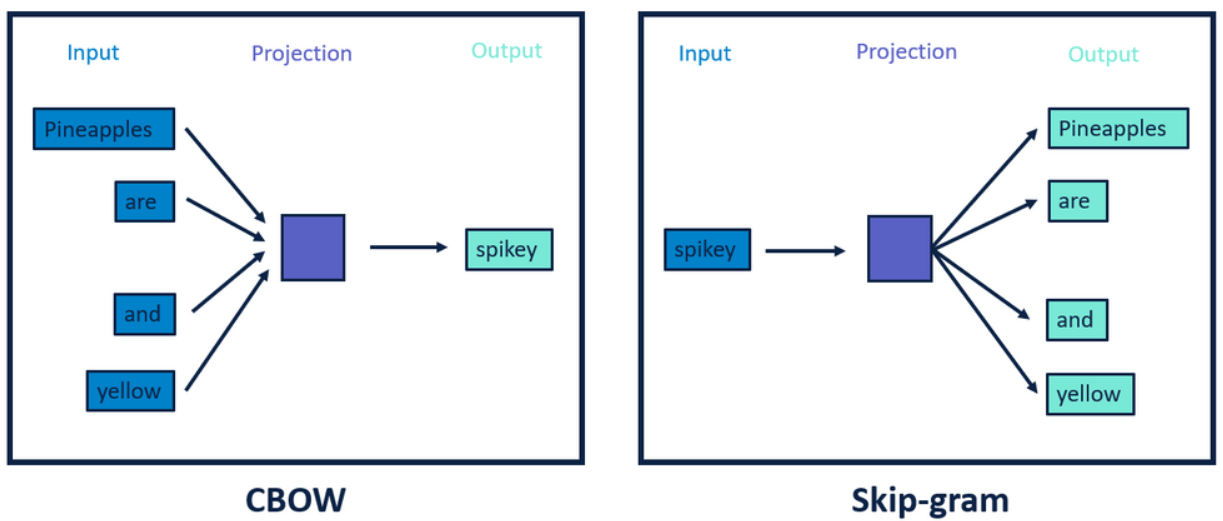


https://community.alteryx.com/t5/Data-Science/Word2vec-for-the-Alteryx-Community/ba-p/305285

Even though Word2Vec is an unsupervised model that can construct dense word embeddings from a corpus without any label information, Word2Vec internally uses a supervised classification model to extract these embeddings from the corpus.


### **CBOW**

The CBOW architecture includes a deep learning classification model that uses context words as input (X) to predict our target word, Y. Consider the following scenario: Have a wonderful day.

- Context words are initially supplied as an input to an embedding layer.
- The word embeddings are then transferred to a lambda layer, where the word embeddings are averaged.
- The embeddings are then passed to a dense SoftMax layer, predicting our target word. We compute the loss after matching this with our target word and then run backpropagation with each epoch to update the embedding layer in the process.\

Once the training is complete, we may extract the embeddings of the required words from our embedding layer.


### **Skip Gram**

The context words are predicted in the skip-gram model given a target (center) word. Consider the following sentence: "Word2Vec uses a deep learning model in the backend." Given the center word 'learning' and a context window size of 2, the model tries to predict ['deep,' 'model'], and so on.

We feed the skip-gram model pairs of (X, Y), where X is our input and Y is our label, because the model has to predict many words from a single provided word. This is accomplished by creating positive and negative input samples.

These samples alert the model to contextually relevant terms, causing it to construct similar embeddings for words with similar meanings.

- Individual embedding layers are passed both the target and context word pairs, yielding dense word embeddings for each of these two words.
- The dot product of these two embeddings is computed using a 'merge layer,' and the dot product value is obtained.
- The value of the dot product is then transmitted to a dense sigmoid layer, which outputs 0 or 1.
- The output is compared to the actual value or label, and the loss is calculated, then backpropagation is used to update the embedding layer at each epoch.

## Pros and cons

#### **CBOW**
##### Advantages
- It is generally thought to outperform deterministic approaches because of its probabilistic character.
- It does not necessitate a large amount of RAM. As a result, it has a low memory capacity.

##### Disadvantages
- It averages the context of a word. E.g. the word Apple. Can refer to both a fruit and a company, but CBOW averages the two meanings and places it in a cluster for both fruits and companies.
_________________________________________________________
#### **Skip Gram**
##### Advantages
- It can capture two interpretations for a single word. E.g. the word Apple. One is for the business, while the other is for the fruit.
- Skip-gram with negative subsampling outperforms all other methods in general.

##### Disadvantages
- Time and power consuming (heavy).

(More info: https://www.codingninjas.com/studio/library/cbow-vs-skip-gram)

### BERT

Bert is a Bidirectional Encoder Representations from Transformers (BERT) is a family of language models introduced in 2018 by researchers at Google. A 2020 literature survey concluded that "in a little over a year, BERT has become a ubiquitous baseline in Natural Language Processing (NLP) experiments counting over 150 research publications analyzing and improving the model". (Wikipedia)

Really deep in NLP. I added de name here for you know that it exists but we won't use it.

Feel free to check it, if you are interested. 